<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/deep_inv_opt/Copy_of_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup for Google Colab**
- Open this notebook in Google Colab (change the url of this file from `github.com` to `githubtocolab.com` hit Enter)
- Execute it (click on the symbol `[ ]` of the cell, you should get the output `/content/deep_inv_opt`)
- Comment it again (add `#` at the beginning of each line)

In [ ]:
!git clone https://github.com/yingcongtan/deep_inv_opt.git
%cd deep_inv_opt
!pip install -e .

# Example 1: Using deep_inv_opt with a single target point

In [4]:
# Copyright (C) to Yingcong Tan, Andrew Delong, Daria Terekhov. All Rights Reserved.

import numpy as np
import deep_inv_opt as io
import deep_inv_opt.plot as iop

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.max_open_warning'] = 0  # Let the plots flow!
%matplotlib inline

### Define a simple LP with 3 inequality constraints and 1 equality constraint

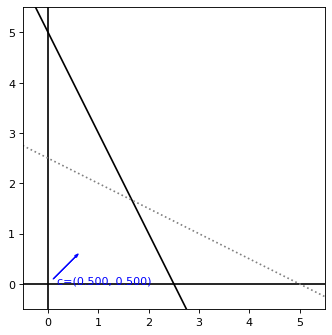

In [5]:
# Define an LP instance. Each is just a torch.DoubleTensor object.
c_init = io.tensor([[0.5],
                    [0.5]])
A_ub = io.tensor([[-1.0,  0.0],      # x1 >= 0
                  [ 0.0, -1.0],      # x2 >= 0
                  [ 2.0,  1.0]])     # 2*x1 + x2 <= 5
b_ub = io.tensor([[ 0.0],
                  [ 0.0],
                  [ 5.0]])
A_eq = io.tensor([[1.0, 2.0]])       # x1 + 2*x2 = 5
b_eq = io.tensor([[5.0]])

xylim = ((-0.5, 5.5), (-0.5, 5.5))
iop.plot_linprog(c_init, A_ub, b_ub, A_eq, b_eq, xylim);

### Run forward solver and plot the central path. Should output x*=(0.0, 2.5)

tensor([[1.5113e-05],
        [2.5000e+00]], dtype=torch.float64)

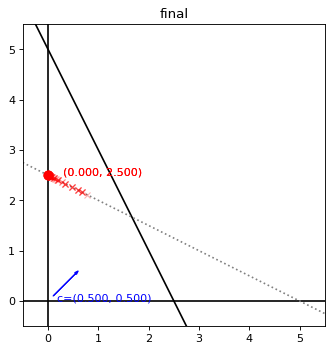

In [6]:
io.linprog(c_init, A_ub, b_ub, A_eq, b_eq,
           callback=iop.linprog_path_plotter(xylim))

### Learn "c only" (a new cost vector) that minimizes squared error with respect to a target x=(2.0, 2.0)

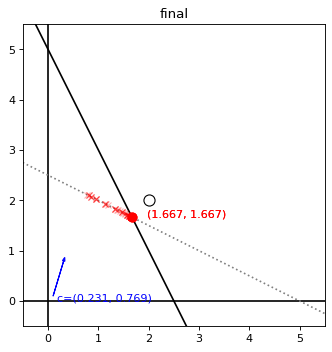

In [7]:
# Define a single point target
x_target = io.tensor([[2.0],
                      [2.0]])

# Inverse solve for c only, and pull out just the new c vector from the result
c, *_ = io.inverse_linprog(x_target, c_init, A_ub, b_ub, A_eq, b_eq)

# Forward solve with the new c vector and plot the new central path
io.linprog(c, A_ub, b_ub, A_eq, b_eq, callback=iop.linprog_path_plotter(xylim))
plt.plot([2], [2], 'ok', markerfacecolor='none', markersize=10);

### Same as above, but show progress by plotting the curent solution at every 20th step of inverse optimization

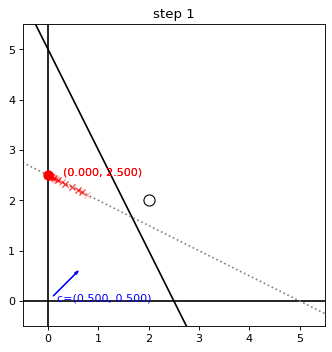

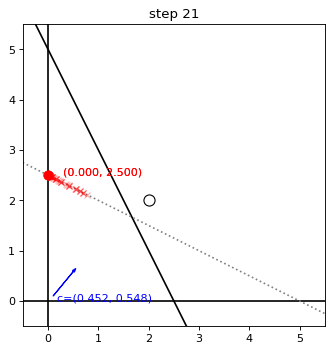

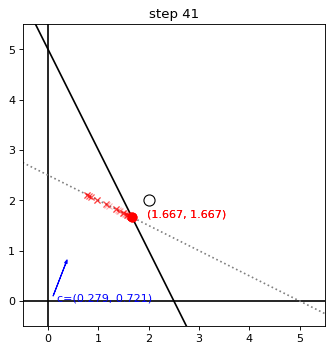

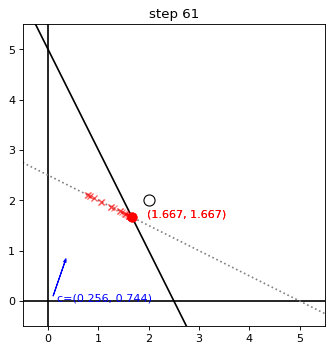

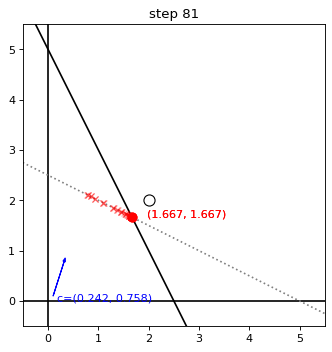

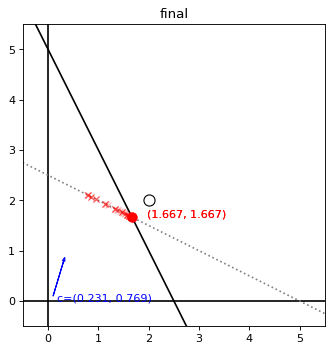

In [8]:
c, *_ = io.inverse_linprog(x_target, c_init, A_ub, b_ub, A_eq, b_eq,
                           callback=iop.inverse_linprog_step_plotter(xylim, frequency=20))

### Learn "c, A, b jointly" so that the constraints can move closer to the target, too.

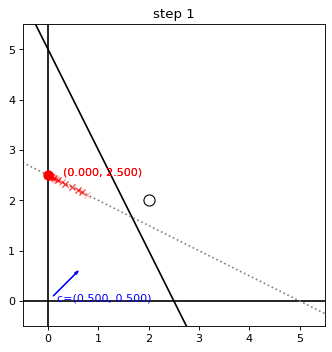

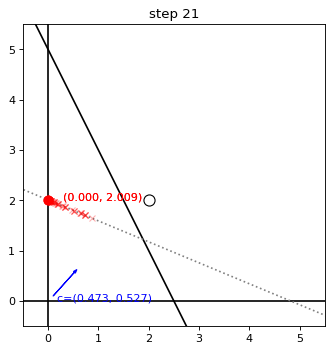

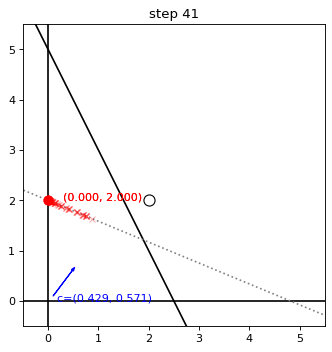

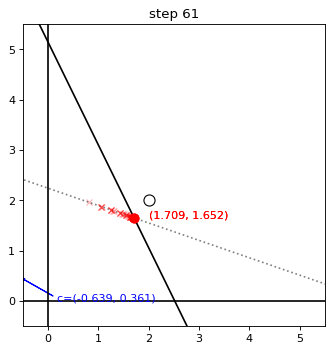

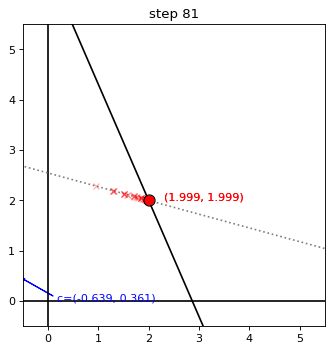

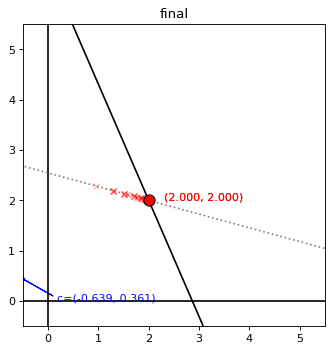

In [9]:
c, *_ = io.inverse_linprog(x_target, c_init, A_ub, b_ub, A_eq, b_eq,
                           learn_rate_ub=io.tensor([[0.0],    # Constraint x1 >= 0 should stay fixed
                                                    [0.0],    # Constraint x2 >= 0 should stay fixed
                                                    [0.1]]),  # Constraint 2*x1 + x2 <= 5 is allowed to change
                           learn_rate_eq=0.1,                 # Constraint x1 + 2*x2 = 5 is allowed to change
                           callback=iop.inverse_linprog_step_plotter(xylim, frequency=20))